# Steam analysis
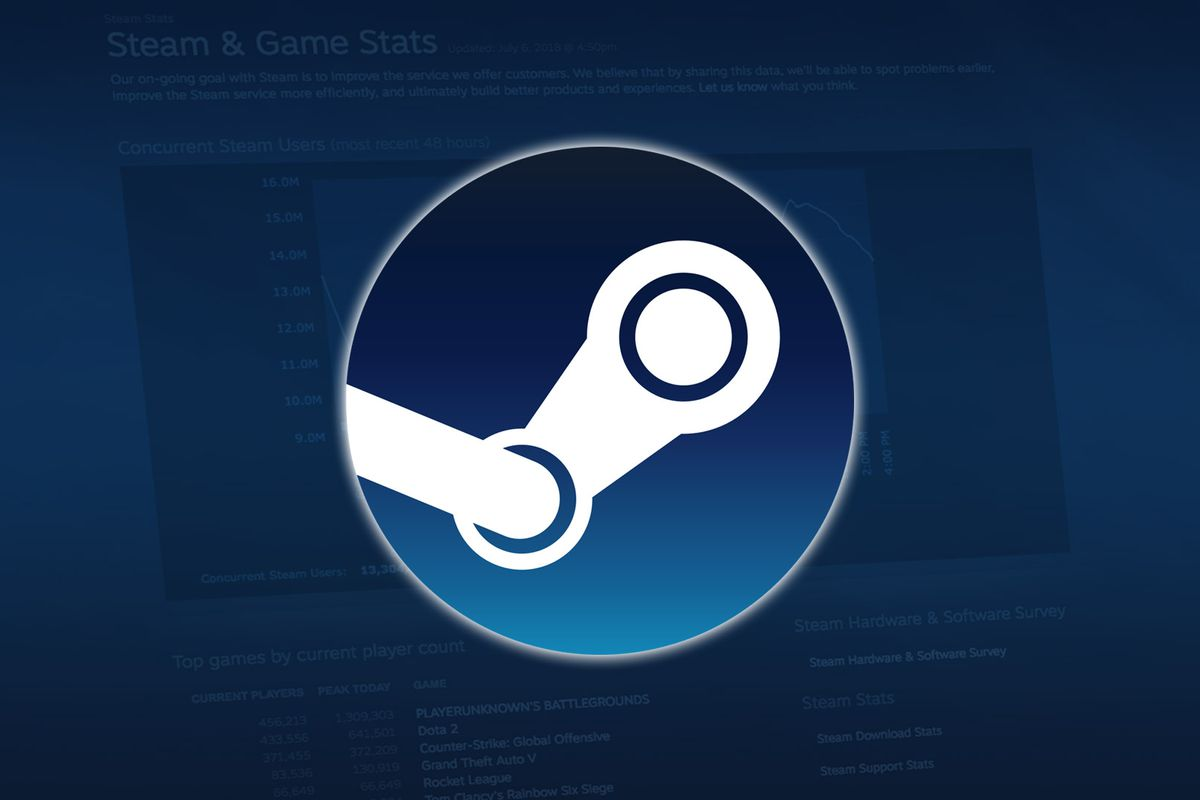
 Steam is a video game digital distribution service by Valve. It was launched as a standalone software client in September 2003 as a way for Valve to provide automatic updates for their games, and expanded to include games from third-party publishers. Steam has also expanded into an online web-based and mobile digital storefront. Steam offers digital rights management (DRM), server hosting, video streaming, and social networking services. It also provides the user with installation and automatic updating of games, and community features such as friends lists and groups, cloud storage, and in-game voice and chat functionality.

<font color = 'blue'>
Contents:
1. [Importing data and libraries](#1)
1. [Load and Check Data](#2)
    * [Edit Data](#3)
1. [Visualizations](#4)


In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# we dont need to see warnings
import warnings
warnings.filterwarnings('ignore')

<a id = '1'> </a> </br>
# Importing libraries

<a id = '2'> </a> </br>
# Load and Check Data

In [63]:
steam_data = pd.read_csv("dataset/steam-200k.csv")
steam_data.head()

,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
0,151603712,The Elder Scrolls V Skyrim,play,273.0,0
1,151603712,Fallout 4,purchase,1.0,0
2,151603712,Fallout 4,play,87.0,0
3,151603712,Spore,purchase,1.0,0
4,151603712,Spore,play,14.9,0


### we take a copy before doing anything

In [64]:
data_copy = steam_data.copy()
data_copy.head()

,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
0,151603712,The Elder Scrolls V Skyrim,play,273.0,0
1,151603712,Fallout 4,purchase,1.0,0
2,151603712,Fallout 4,play,87.0,0
3,151603712,Spore,purchase,1.0,0
4,151603712,Spore,play,14.9,0


<a id = '3'> </a> </br>
# Edit Data
*  We have "The Elder Scrolls V Skyrim" columns actualy it's "Name of the games"
*  We have "151603712" columns that means "User ID"
*  Data info says about'1.0' columns "Hours if behavior is play, 1.0 if behavior is purchase"

In [65]:
steam_data = steam_data.rename(columns={"The Elder Scrolls V Skyrim": "Name of the games"})
steam_data = steam_data.rename(columns={"151603712": "User ID"})
steam_data = steam_data.rename(columns={"1.0": "Hoursplay"})
steam_data = steam_data.drop(['0'], axis=1)

In [66]:
steam_data.head()

,User ID,Name of the games,purchase,Hoursplay
0,151603712,The Elder Scrolls V Skyrim,play,273.0
1,151603712,Fallout 4,purchase,1.0
2,151603712,Fallout 4,play,87.0
3,151603712,Spore,purchase,1.0
4,151603712,Spore,play,14.9


In [67]:
steam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199999 entries, 0 to 199998
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   User ID            199999 non-null  int64  
 1   Name of the games  199999 non-null  object 
 2   purchase           199999 non-null  object 
 3   Hoursplay          199999 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.1+ MB


## We can see there is "purchase" columns and it is Categorical

In [68]:
from pandas.api.types import CategoricalDtype
steam_data.purchase = steam_data.purchase.astype(CategoricalDtype(ordered = True))

In [69]:
steam_data.dtypes

User ID                 int64
Name of the games      object
purchase             category
Hoursplay             float64
dtype: object

In [70]:
steam_data.purchase.head(1)

0    play
Name: purchase, dtype: category
Categories (2, object): [play < purchase]

# I want to see How many game and User we have
 * How many User ID we have 
 * How many games we have 

In [71]:
steam_data.count()

User ID              199999
Name of the games    199999
purchase             199999
Hoursplay            199999
dtype: int64

In [72]:
total_user_id = steam_data["User ID"].unique().sum()
total_user_id

1996978898993

In [73]:
steam_data["Name of the games"].value_counts()

Dota 2                                                 9682
Team Fortress 2                                        4646
Counter-Strike Global Offensive                        2789
Unturned                                               2632
Left 4 Dead 2                                          1752
                                                       ... 
Data Hacker Corruption                                    1
Incognito                                                 1
RPG Maker MV Essentials Add-On                            1
Rubber and Lead                                           1
Tom Clancy's Ghost Recon Phantoms - EU 6000 GC Pack       1
Name: Name of the games, Length: 5155, dtype: int64

In [74]:
total_game = steam_data.groupby('Name of the games')['Name of the games'].agg('count')
total_game

Name of the games
007 Legends                                                     2
0RBITALIS                                                       6
1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby)     12
10 Second Ninja                                                 8
10,000,000                                                      2
                                                             ... 
sZone-Online                                                  160
samurai_jazz                                                    1
the static speaks my name                                      21
theHunter                                                     372
theHunter Primal                                                8
Name: Name of the games, Length: 5155, dtype: int64

In [75]:
total_purchase = steam_data.groupby('purchase')['purchase'].agg('count')
total_purchase

purchase
play         70489
purchase    129510
Name: purchase, dtype: int64

In [76]:
steam_data.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,199999.0,1.036556e+08,7.208084e+07,5250.0,47384202.0,86912006.0,154230933.0,309903146.0
Hoursplay,199999.0,1.787447e+01,1.380573e+02,0.1,1.0,1.0,1.3,11754.0


In [77]:
steam_data.isnull().sum()

User ID              0
Name of the games    0
purchase             0
Hoursplay            0
dtype: int64

In [78]:
steam_data.columns

Index(['User ID', 'Name of the games', 'purchase', 'Hoursplay'], dtype='object')

<a id = '4'> </a> </br>
# Visualizations

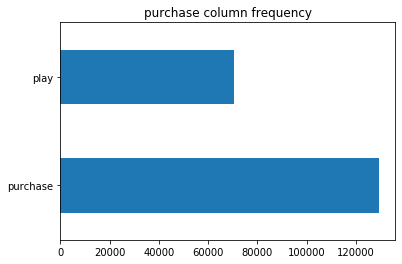

In [79]:
steam_data["purchase"].value_counts().plot.barh().set_title("purchase column frequency");

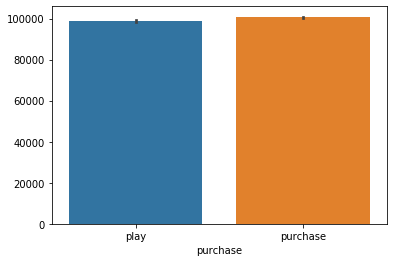

In [80]:
sns.barplot(x = "purchase", y = steam_data.purchase.index, data = steam_data)

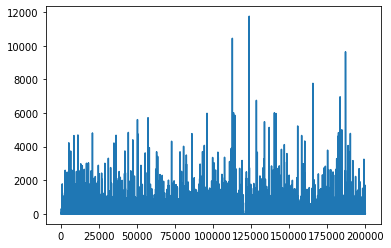

In [81]:
steam_data["Hoursplay"].plot()

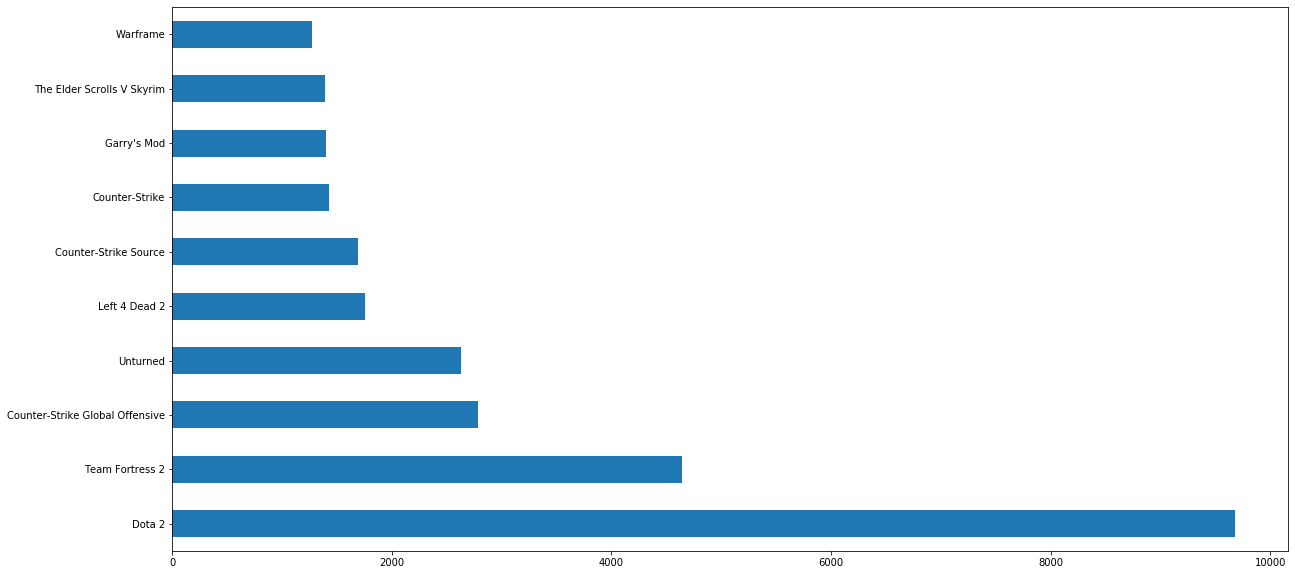

In [82]:
steam_data['Name of the games'].value_counts().head(10).plot(kind='barh', figsize=(20,10))

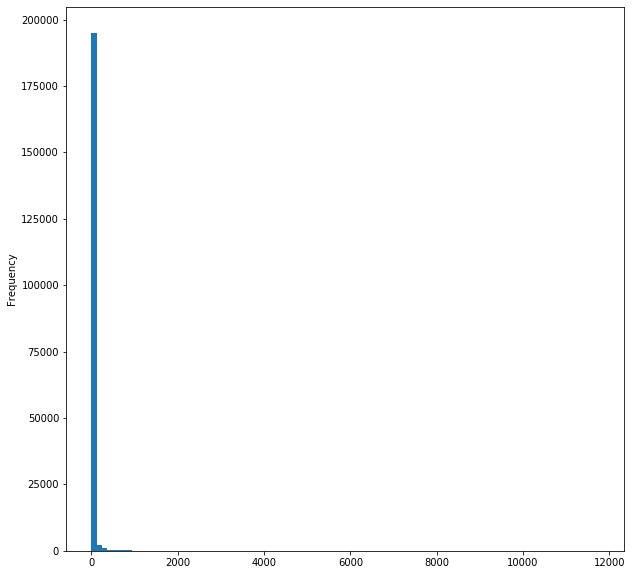

In [83]:
steam_data.Hoursplay.plot(kind = 'hist',bins = 100,figsize = (10,10))
plt.show()

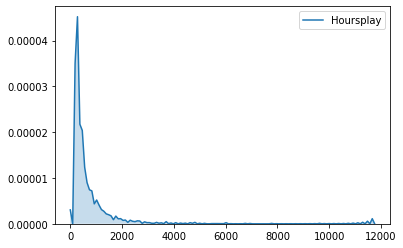

In [84]:

sns.kdeplot(steam_data.Hoursplay, shade = True);

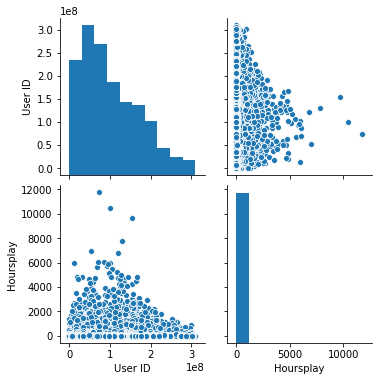

In [85]:
sns.pairplot(steam_data);

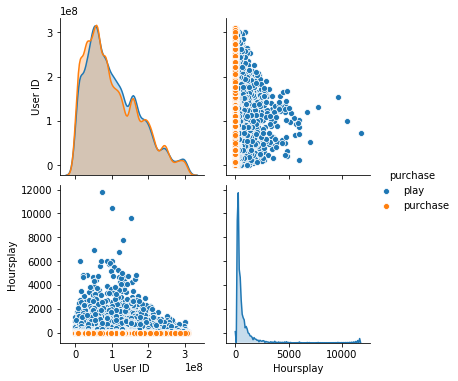

In [86]:
sns.pairplot(steam_data, hue="purchase");

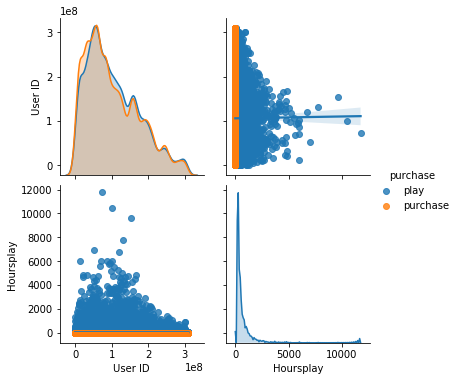

In [87]:
sns.pairplot(steam_data, kind = "reg" , hue = "purchase");

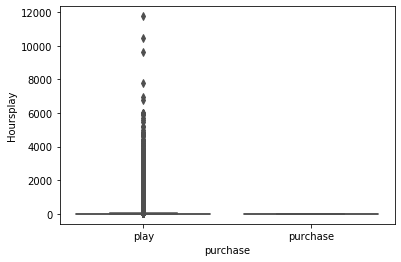

In [88]:
sns.boxplot(x='purchase',y='Hoursplay',data=steam_data,palette='rainbow')

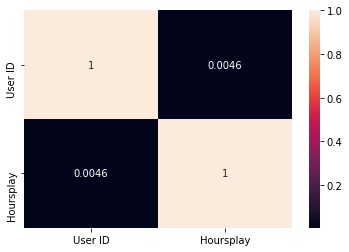

In [89]:
sns.heatmap(steam_data.corr(), annot=True)